In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText


import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit
%matplotlib inline

In [2]:
### import data of simulation 1 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1,vx_1,vy_1,vz_1,vr_1,vtheta_1,vphi_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
### import data of simulation 2 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2,vx_2,vy_2,vz_2,vr_2,vtheta_2,vphi_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation 1 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1,vr_wo_1,vtheta_wo_1,vphi_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31,32,33,34,35,36,37), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data of simulation 2 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2,vr_wo_2,vtheta_wo_2,vphi_wo_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### load radii, actions, half light and half mass radii for simulations ###
r3d_1,J_phi_1,J_theta_1,J_r_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH1.txt')
r3d_2,J_phi_2,J_theta_2,J_r_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH2.txt')
r3d_wo_1,J_phi_wo_1,J_theta_wo_1,J_r_wo_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH1.txt')
r3d_wo_2,J_phi_wo_2,J_theta_wo_2,J_r_wo_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH2.txt')
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2=np.loadtxt('half_mass_and_half_light_radius')

In [7]:
print(hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2)

4.13329 3.57968 2.08948 2.11546 7.8937 5.40817 6.7517 3.85325


In [8]:
print(np.sum(m1_1+m2_1),np.sum(m1_2+m2_2),np.sum(m1_wo_1+m2_wo_1),np.sum(m1_wo_2+m2_wo_2))

308533.169063 326253.447659 172671.281141 669844.310538


In [9]:
### initialize orbit class ###

bh_orbit_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m1_1[0]+m2_1[0])
bh_orbit_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m1_2[0]+m2_2[0])
wobh_orbit_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
wobh_orbit_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [10]:
### loads guiding star radii for every star of both simulations ###
r_guide_bh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH1.txt',unpack='True')
r_guide_bh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH2.txt',unpack='True')
r_guide_wobh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH1.txt',unpack='True')
r_guide_wobh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH2.txt',unpack='True')

#per_1=np.loadtxt('../Dokumente/Bachelorarbeit-2/per_IMBH1.txt',unpack=True)
#per_2=np.loadtxt('../Dokumente/Bachelorarbeit-2/per_IMBH2.txt',unpack=True)
#per_wo_1=np.loadtxt('../Dokumente/Bachelorarbeit-2/per_noIMBH1.txt',unpack=True)
#per_wo_2=np.loadtxt('../Dokumente/Bachelorarbeit-2/per_noIMBH2.txt',unpack=True)

In [11]:
### sorts action arrays as guiding star radius array is sorted ###

#with IMBH 1
r_guide_bh_argsort_1=np.argsort(r_guide_bh_1)
r_guide_bh_sort_1=r_guide_bh_1[r_guide_bh_argsort_1]
J_r_bh_sort_1=J_r_1[r_guide_bh_argsort_1]
J_theta_bh_sort_1=J_theta_1[r_guide_bh_argsort_1]
J_phi_bh_sort_1=J_phi_1[r_guide_bh_argsort_1]

#with IMBH 2
r_guide_bh_argsort_2=np.argsort(r_guide_bh_2)
r_guide_bh_sort_2=r_guide_bh_2[r_guide_bh_argsort_2]
J_r_bh_sort_2=J_r_2[r_guide_bh_argsort_2]
J_theta_bh_sort_2=J_theta_2[r_guide_bh_argsort_2]
J_phi_bh_sort_2=J_phi_2[r_guide_bh_argsort_2]

#without IMBH 1
r_guide_wobh_argsort_1=np.argsort(r_guide_wobh_1)
r_guide_wobh_sort_1=r_guide_wobh_1[r_guide_wobh_argsort_1]
J_r_wobh_sort_1=J_r_wo_1[r_guide_wobh_argsort_1]
J_theta_wobh_sort_1=J_theta_wo_1[r_guide_wobh_argsort_1]
J_phi_wobh_sort_1=J_phi_wo_1[r_guide_wobh_argsort_1]

#without IMBH 2
r_guide_wobh_argsort_2=np.argsort(r_guide_wobh_2)
r_guide_wobh_sort_2=r_guide_wobh_2[r_guide_wobh_argsort_2]
J_r_wobh_sort_2=J_r_wo_2[r_guide_wobh_argsort_2]
J_theta_wobh_sort_2=J_theta_wo_2[r_guide_wobh_argsort_2]
J_phi_wobh_sort_2=J_phi_wo_2[r_guide_wobh_argsort_2]

In [12]:
### calculate mean values of actions and radii ###

#IMBH1
binning=1000
r_mean_1=np.zeros((len(J_r_bh_sort_1)/binning))
Jr_mean_1=np.zeros(int(len(J_r_bh_sort_1)/binning))
Jtheta_mean_1=np.zeros(int(len(J_r_bh_sort_1)/binning))
Jphi_mean_1=np.zeros(int(len(J_r_bh_sort_1)/binning))
for i in range(int(len(J_r_bh_sort_1)/binning)):
    Jr_mean_1[i]=np.mean(J_r_bh_sort_1[i*binning:(i+1)*binning])
    Jtheta_mean_1[i]=np.mean(J_theta_bh_sort_1[i*binning:(i+1)*binning])
    Jphi_mean_1[i]=np.mean(J_phi_bh_sort_1[i*binning:(i+1)*binning])
    r_mean_1[i]=np.mean(r_guide_bh_sort_1[i*binning:(i+1)*binning])

#IMBH2
r_mean_2=np.zeros((len(J_r_bh_sort_2)/binning))
Jr_mean_2=np.zeros(int(len(J_r_bh_sort_2)/binning))
Jtheta_mean_2=np.zeros(int(len(J_r_bh_sort_2)/binning))
Jphi_mean_2=np.zeros(int(len(J_r_bh_sort_2)/binning))
for i in range(int(len(J_r_bh_sort_2)/binning)):
    Jr_mean_2[i]=np.mean(J_r_bh_sort_2[i*binning:(i+1)*binning])
    Jtheta_mean_2[i]=np.mean(J_theta_bh_sort_2[i*binning:(i+1)*binning])
    Jphi_mean_2[i]=np.mean(J_phi_bh_sort_2[i*binning:(i+1)*binning])
    r_mean_2[i]=np.mean(r_guide_bh_sort_2[i*binning:(i+1)*binning])
    
#w/o IMBH 1
r_mean_wo_1=np.zeros((len(J_r_wobh_sort_1)/binning))
Jr_mean_wo_1=np.zeros(int(len(J_r_wobh_sort_1)/binning))
Jtheta_mean_wo_1=np.zeros(int(len(J_theta_wobh_sort_1)/binning))
Jphi_mean_wo_1=np.zeros(int(len(J_phi_wobh_sort_1)/binning))
for i in range(int(len(J_r_wobh_sort_1)/binning)):
    Jr_mean_wo_1[i]=np.mean(J_r_wobh_sort_1[i*binning:(i+1)*binning])
    Jtheta_mean_wo_1[i]=np.mean(J_theta_wobh_sort_1[i*binning:(i+1)*binning])
    Jphi_mean_wo_1[i]=np.mean(J_phi_wobh_sort_1[i*binning:(i+1)*binning])
    r_mean_wo_1[i]=np.mean(r_guide_wobh_sort_1[i*binning:(i+1)*binning])
    
#w/o IMBH 2
r_mean_wo_2=np.zeros((len(J_r_wobh_sort_2)/binning))
Jr_mean_wo_2=np.zeros(int(len(J_r_wobh_sort_2)/binning))
Jtheta_mean_wo_2=np.zeros(int(len(J_theta_wobh_sort_2)/binning))
Jphi_mean_wo_2=np.zeros(int(len(J_phi_wobh_sort_2)/binning))
for i in range(int(len(J_r_wobh_sort_2)/binning)):
    Jr_mean_wo_2[i]=np.mean(J_r_wobh_sort_1[i*binning:(i+1)*binning])
    Jtheta_mean_wo_2[i]=np.mean(J_theta_wobh_sort_2[i*binning:(i+1)*binning])
    Jphi_mean_wo_2[i]=np.mean(J_phi_wobh_sort_2[i*binning:(i+1)*binning])
    r_mean_wo_2[i]=np.mean(r_guide_wobh_sort_2[i*binning:(i+1)*binning])

### calculate guiding star radii over effective radii ###

r_bh_1=r_mean_1/hmr_bh_1
r_bh_2=r_mean_2/hmr_bh_2
r_wo_bh_1=r_mean_wo_1/hmr_wo_bh_1
r_wo_bh_2=r_mean_wo_2/hmr_wo_bh_2


/home/sophia/anaconda3/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/sophia/anaconda3/lib/python3.4/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
### calculate angular mom, energy and circular velocity ###
L_1=bh_orbit_1.angularmom(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])[0]
L_2=bh_orbit_2.angularmom(x_2[1:],y_2[1:],z_2[1:],vx_2[1:],vy_2[1:],vz_2[1:])[0]
L_wo_1=wobh_orbit_1.angularmom(x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1)[0]
L_wo_2=wobh_orbit_2.angularmom(x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2)[0]

E_1 = bh_orbit_1.energy(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])
E_2 = bh_orbit_2.energy(x_2[1:],y_2[1:],z_2[1:],vx_2[1:],vy_2[1:],vz_2[1:])
E_wo_1 = wobh_orbit_1.energy(x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1)
E_wo_2 = wobh_orbit_2.energy(x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2)

v_circ_1=bh_orbit_1.v_circ(r_3d_1[1:])
v_circ_2=bh_orbit_2.v_circ(r_3d_2[1:])
v_circ_wo_1=wobh_orbit_1.v_circ(r_3d_wo_1)
v_circ_wo_2=wobh_orbit_2.v_circ(r_3d_wo_2)

### cut nAn values out of J_r ###
J_r_1[np.isnan(J_r_1)]=-99.
J_r_2[np.isnan(J_r_2)]=-99.
J_r_wo_1[np.isnan(J_r_wo_1)]=-99.
J_r_wo_2[np.isnan(J_r_wo_2)]=-99.

In [12]:
### find binaries ###

bin_bool_1= (m1_1 != 0)* (m2_1 != 0)
bin_bool_2= (m1_2 != 0)* (m2_2 != 0)
bin_bool_wo_1= (m1_wo_1 != 0)* (m2_wo_1 != 0)
bin_bool_wo_2= (m1_wo_2 != 0)* (m2_wo_2 != 0)

single_bool_1=np.invert(bin_bool_1)
single_bool_2=np.invert(bin_bool_2)
single_bool_wo_1=np.invert(bin_bool_wo_1)
single_bool_wo_2=np.invert(bin_bool_wo_2)


In [15]:
### calculate anisitropy parameter and according distance ###

### w/ IMBH 1 ###
bh_1=GCphasespace(r=r3d_1,bin_num=30)
r_beta_1=bh_1.mean_distance(r_guide_bh_sort_1) #use guiding star radius
beta_1=bh_1.anisotropy_param(vr_1,vtheta_1,vphi_1)

### w/ IMBH 2 ###
bh_2=GCphasespace(r=r3d_2,bin_num=30)
r_beta_2=bh_2.mean_distance(r_guide_bh_sort_2) #use guiding star radius
beta_2=bh_2.anisotropy_param(vr_2,vtheta_2,vphi_2)

### w/o IMBH 1 ###
wo_bh_1=GCphasespace(r=r3d_wo_1,bin_num=30)
r_beta_wo_1=wo_bh_1.mean_distance(r_guide_wobh_sort_1) #use guiding star radius
beta_wo_1=wo_bh_1.anisotropy_param(vr_wo_1,vtheta_wo_1,vphi_wo_1)

### w/o IMBH 2 ###
wo_bh_2=GCphasespace(r=r3d_wo_2,bin_num=30)
r_beta_wo_2=wo_bh_2.mean_distance(r_guide_wobh_sort_2) #use guiding star radius
beta_wo_2=wo_bh_2.anisotropy_param(vr_wo_2,vtheta_wo_2,vphi_wo_2)

### calculate giuding star radii over effective radii ###

r_beta_bh_1=r_beta_1/hmr_bh_1
r_beta_bh_2=r_beta_2/hmr_bh_2
r_beta_wo_bh_1=r_beta_wo_1/hmr_wo_bh_1
r_beta_wo_bh_2=r_beta_wo_2/hmr_wo_bh_2

In [44]:
### find unnormal behaving stars ###

#E_1 = bh_orbit_1.energy(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])
#L_1=bh_orbit_1.angularmom(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])[0]
k_1_test=E_1<-0.8e-24
l_1_test=J_r_1>150
l_1=np.flatnonzero(k_1_test+l_1_test)

#E_2 = bh_orbit_2.energy(x_2[1:],y_2[1:],z_2[1:],vx_2[1:],vy_2[1:],vz_2[1:])
#L_2=bh_orbit_2.angularmom(x_2[1:],y_2[1:],z_2[1:],vx_2[1:],vy_2[1:],vz_2[1:])[0]
k_2_test=E_2<-0.8e-24
l_2_test=J_r_2>150
l_2=np.flatnonzero(k_2_test+l_2_test)
#print(l_1,l_2)

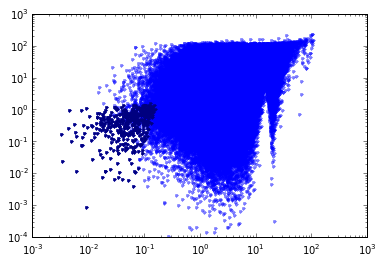

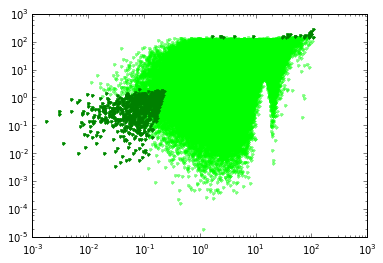

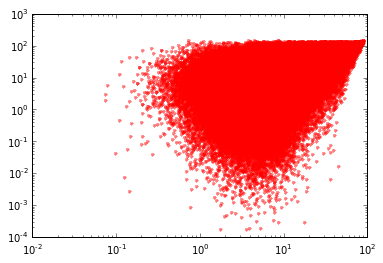

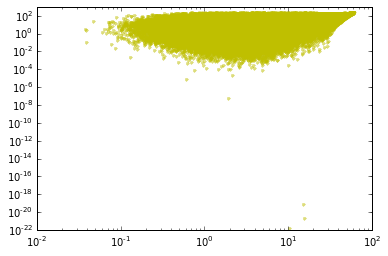

In [45]:
### plot actions over actual distance ###

plt.loglog(r3d_1,J_r_1,'b.',alpha=0.5)
#plt.show()
plt.loglog(r3d_1[k_1_test],J_r_1[k_1_test],'.',color='navy')
plt.show()
plt.loglog(r3d_2,J_r_2,'.',color='lime',alpha=0.5)
#plt.show()
plt.loglog(r3d_2[l_2],J_r_2[l_2],'.',color='green')
plt.show()
plt.loglog(r3d_wo_1,J_r_wo_1,'r.',alpha=0.5)
plt.show()
plt.loglog(r3d_wo_2,J_r_wo_2,'y.',alpha=0.5)


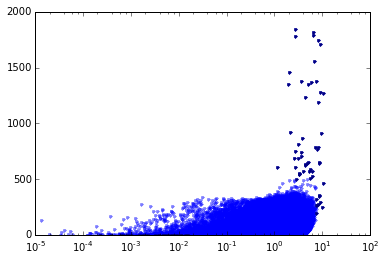

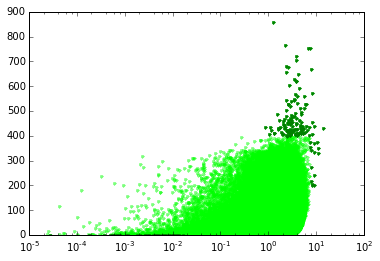

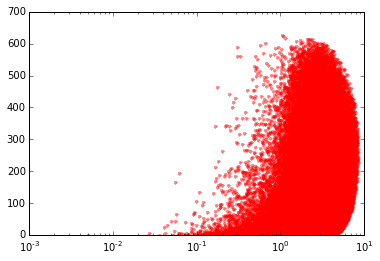

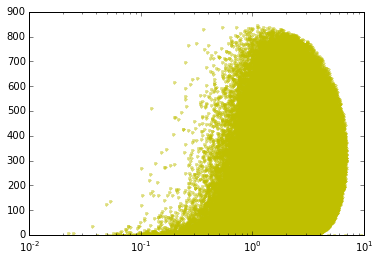

In [18]:
### plot sorted J_r over guiding star radius in semilogx ###

plt.semilogx(r_guide_bh_sort_1,J_r_bh_sort_1,'b.',alpha=0.5)
plt.semilogx(r_guide_bh_1[l_1],J_r_1[l_1],'.',color='navy')
plt.show()
plt.semilogx(r_guide_bh_sort_2,J_r_bh_sort_2,'.',color='lime',alpha=0.5)
plt.semilogx(r_guide_bh_2[l_2],J_r_2[l_2],'g.')
plt.show()
plt.semilogx(r_guide_wobh_sort_1,J_r_wobh_sort_1,'r.',alpha=0.5)
plt.show()
plt.semilogx(r_guide_wobh_sort_2,J_r_wobh_sort_2,'y.',alpha=0.5)


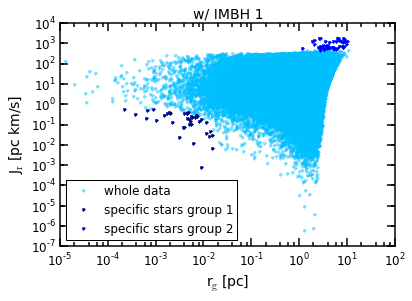

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0
/home/sophia/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:802: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


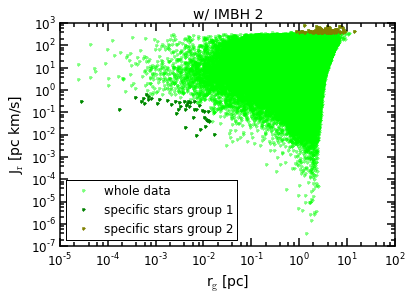

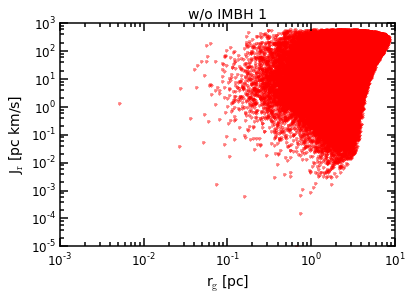

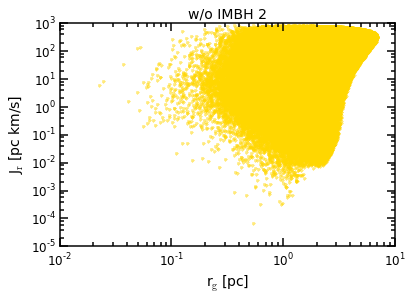

In [58]:
### plots sorted J_r over guiding star radius in loglog ###

### IMBH 1 ###
fig=plt.figure()
ax=fig.add_subplot(111)
ax.loglog(r_guide_bh_sort_1,J_r_bh_sort_1,'.',color='Deepskyblue',alpha=0.5,label='whole data')
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.loglog(r_guide_bh_1[k_1_test],J_r_1[k_1_test],'.',color='navy',label='specific stars group 1')
ax.loglog(r_guide_bh_1[l_1_test],J_r_1[l_1_test],'.',color='Blue',label='specific stars group 2')
ax.set_xlabel('r$_\mathrm{g}$ [pc]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 1',fontsize=14)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
ax.legend(loc=0,numpoints=1)

fig.savefig('../Bachelorarbeit-Entwurf/Plots/r_g_J_r_IMBH1.png',format='png',dpi=300,bbox_inches='tight')

plt.show()

### IMBH 2 ###
fig=plt.figure()
ax=fig.add_subplot(111)
ax.loglog(r_guide_bh_sort_2,J_r_bh_sort_2,'.',color='lime',alpha=0.5,label='whole data')
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.loglog(r_guide_bh_2[k_2_test],J_r_2[k_2_test],'g.',label='specific stars group 1')
ax.loglog(r_guide_bh_2[l_2_test],J_r_2[l_2_test],'.',color='Olive',label='specific stars group 2')
ax.set_xlabel('r$_\mathrm{g}$ [pc]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 2',fontsize=14)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
ax.legend(loc=0,numpoints=1)

fig.savefig('../Bachelorarbeit-Entwurf/Plots/r_g_J_r_IMBH2.png',format='png',dpi=300,bbox_inches='tight')

plt.show()


### no IMBH 1 ###
### IMBH 2 ###
fig=plt.figure()
ax=fig.add_subplot(111)
ax.loglog(r_guide_wobh_sort_1,J_r_wobh_sort_1,'.',color='red',alpha=0.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.set_xlabel('r$_\mathrm{g}$ [pc]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 1',fontsize=14)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/r_g_J_r_noIMBH1.png',format='png',dpi=300,bbox_inches='tight')

plt.show()


### no IMBH 2 ###
fig=plt.figure()
ax=fig.add_subplot(111)
ax.loglog(r_guide_wobh_sort_2,J_r_wobh_sort_2,'.',color='gold',alpha=0.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.set_xlabel('r$_\mathrm{g}$ [pc]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 2',fontsize=14)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/r_g_J_r_noIMBH2.png',format='png',dpi=300,bbox_inches='tight')


/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/contour.py:1516: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


100 101 101


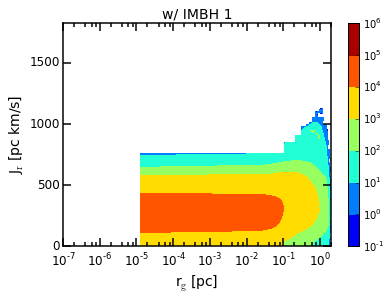

In [37]:
### plots sorted J_r over guiding star radius in loglog ###
H,xedges,yedges=np.histogram2d(r_guide_bh_sort_1,J_r_bh_sort_1,bins=100)
print(len(H),len(xedges),len(yedges))
### IMBH 1 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cont=ax.contourf(xedges[0:-1],yedges[0:-1],H,norm=LogNorm())
ax.tick_params(length=8,width=1.5,labelsize=12)
#ax.loglog(r_guide_bh_1[k_1_test],J_r_1[k_1_test],'.',color='navy',label='specific stars group 1')
#ax.loglog(r_guide_bh_1[l_1_test],J_r_1[l_1_test],'.',color='Blue',label='specific stars group 2')
ax.set_xlabel('r$_\mathrm{g}$ [pc]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 1',fontsize=14)
ax.set_xlim(1e-7,2)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
fig.colorbar(cont)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
ax.legend(loc=0,numpoints=1)
ax.set_xscale('log')
#ax.set_yscale('log')
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/r_g_J_r_IMBH1.png',format='png',dpi=300,bbox_inches='tight')


In [17]:
### identify stars with low r_g but higher radial action ###

rg_1_test=r_guide_bh_1<1e-1
rg_2_test=r_guide_bh_2<1e-1
rg_1=np.flatnonzero(rg_1_test)
rg_2=np.flatnonzero(rg_2_test)
JR_test_1=J_r_1<1e-2
JR_test_2=J_r_2<1e-2
JR_1=np.flatnonzero(JR_test_1)
JR_2=np.flatnonzero(JR_test_2)
print(rg_1_test,np.sum(rg_1_test))
print(rg_1)
print(rg_2_test,np.sum(rg_2_test))
print(rg_2)

[ True  True  True ..., False False False] 6079
[      0       1       2 ..., 1024792 1024932 1025685]
[ True  True  True ..., False False False] 6248
[      0       1       2 ..., 1075978 1076969 1077916]


/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


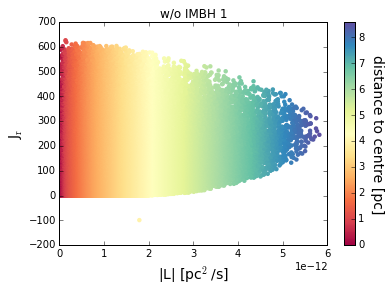

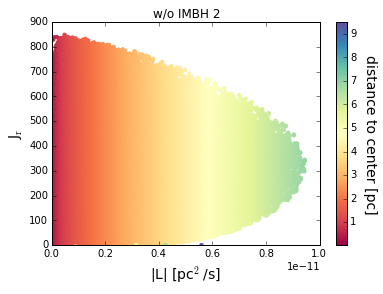

In [45]:
### J_r over |L| noIMBHs ###



fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_wo_1,J_r_wo_1,c=r_guide_wobh_1,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('distance to centre [pc]', rotation=270,fontsize=14)
ax.set_xlim(0,0.6e-11)
#ax.set_ylim(0,700)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.set_title('w/o IMBH 1')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_wo_2,J_r_wo_2,c=r_guide_wobh_2,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('distance to center [pc]', rotation=270,fontsize=14)
ax.set_xlim(0,1e-11)
ax.set_ylim(0,900)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.set_title('w/o IMBH 2')
fig.show()

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


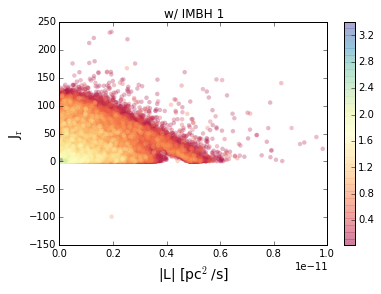

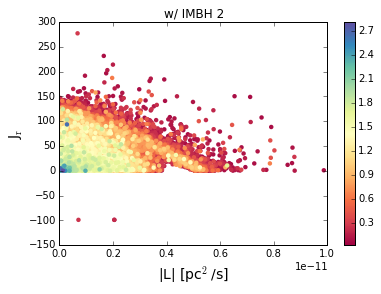

In [28]:
### plot J_r over |L| color coded by different things###

mass1_sort=np.argsort(m1_1[1:]+m2_1[1:])
mass2_sort=np.argsort(m1_2[1:]+m2_2[1:])
m1_sort=np.sort(m1_1[1:]+m2_1[1:])
m2_sort=np.sort(m1_2[1:]+m2_2[1:])

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_1[mass1_sort],J_r_1[mass1_sort],c=m1_sort,cmap='Spectral',edgecolor="None",alpha=0.3)
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
#cbar.set_label('distance to centre [pc]', rotation=270,fontsize=14)
ax.set_xlim(0,1e-11)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
#ax.set_ylim(0,500)
ax.set_title('w/ IMBH 1')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_2[mass2_sort],J_r_2[mass2_sort],c=m2_sort,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
#cbar.set_label('distance to centre [pc]', rotation=270,fontsize=14)
ax.set_xlim(0,1e-11)
#ax.set_ylim(0,50)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.set_title('w/ IMBH 2')
fig.show()

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


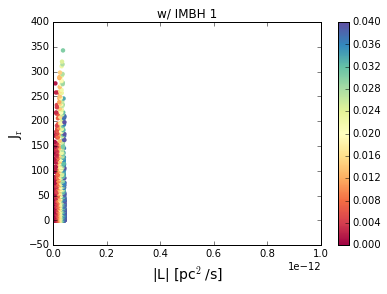

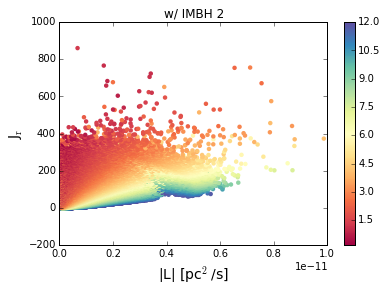

In [47]:
### plot J_r over |L| color coded by different things###

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_1[r_guide_bh_1<0.4e-1],J_r_1[r_guide_bh_1<0.4e-1],c=r_guide_bh_1[r_guide_bh_1<0.4e-1],cmap='Spectral',edgecolor="None",alpha=1)
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
#cbar.set_label('distance to centre [pc]', rotation=270,fontsize=14)
ax.set_xlim(0,0.1e-11)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
#ax.set_ylim(0,500)
ax.set_title('w/ IMBH 1')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_2[np.sqrt(vx_2[1:]**2+vy_2[1:]**2+vz_2[1:]**2)<12.],J_r_2[np.sqrt(vx_2[1:]**2+vy_2[1:]**2+vz_2[1:]**2)<12.],c=np.sqrt(vx_2[1:]**2+vy_2[1:]**2+vz_2[1:]**2)[np.sqrt(vx_2[1:]**2+vy_2[1:]**2+vz_2[1:]**2)<12.],cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
#cbar.set_label('distance to centre [pc]', rotation=270,fontsize=14)
ax.set_xlim(0,1e-11)
#ax.set_ylim(0,50)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.set_title('w/ IMBH 2')
fig.show()

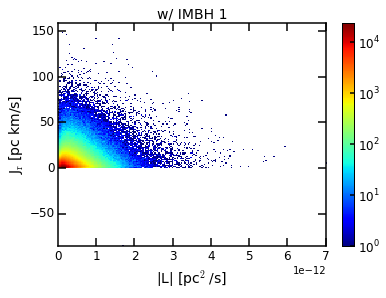

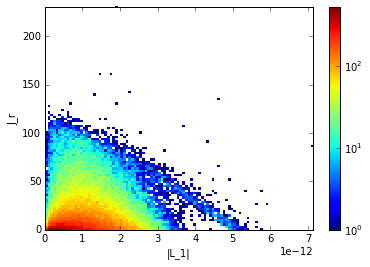

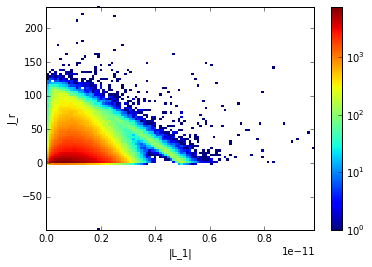

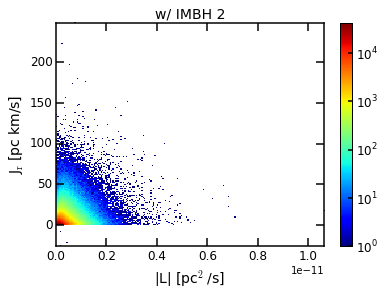

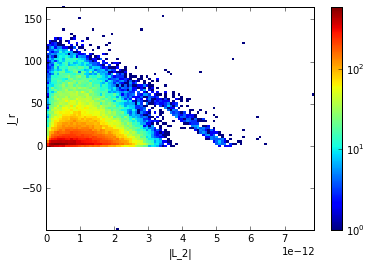

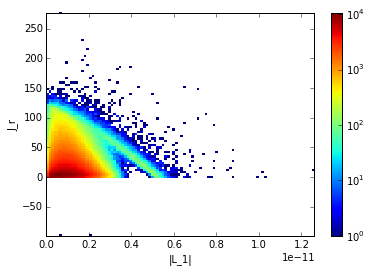

In [29]:
from matplotlib.colors import LogNorm

### IMBH 1 ###

# get number of bins from Rice Rule
k_1=int(2.*len(L_1)**(1./3.))
k_2=int(2.*len(L_2)**(1./3.))

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(L_1*(m1_1[1:]+m2_1[1:]),J_r_1*(m1_1[1:]+m2_1[1:]),bins=k_1,norm=LogNorm())
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 1',fontsize=14)
#ax.set_ylim(-50,)
cbar=fig.colorbar(cax[3],ax=ax)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/L_J_r_justIMBH_hist_IMBH1.pdf',format='pdf',bbox_inches='tight')
plt.show()


plt.hist2d(L_1[bin_bool_1[1:]],J_r_1[bin_bool_1[1:]],bins=100,norm=LogNorm())
plt.xlabel('|L_1|')
plt.ylabel('J_r')
plt.colorbar()
plt.show()

plt.hist2d(L_1[single_bool_1[1:]],J_r_1[single_bool_1[1:]],bins=100,norm=LogNorm())
plt.xlabel('|L_1|')
plt.ylabel('J_r')
plt.colorbar()
plt.show()

#plt.hist2d(L_1[l_1_test],J_r_1[l_1_test],bins=100,norm=LogNorm())
#plt.colorbar()
#plt.show()

#plt.hist2d(L_1[k_1_test],J_r_1[k_1_test],bins=100,norm=LogNorm())
#plt.colorbar()
#plt.show()

### IMBH 2 ###

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(L_2*(m1_2[1:]+m2_2[1:]),J_r_2*(m1_2[1:]+m2_2[1:]),bins=k_2,norm=LogNorm())
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 2',fontsize=14)
#ax.set_ylim(-50,)
cbar=fig.colorbar(cax[3],ax=ax)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/L_J_r_justIMBH_hist_IMBH2.pdf',format='pdf',bbox_inches='tight')
plt.show()



plt.hist2d(L_2[bin_bool_2[1:]],J_r_2[bin_bool_2[1:]],bins=100,norm=LogNorm())
plt.xlabel('|L_2|')
plt.ylabel('J_r')
plt.colorbar()
plt.show()

plt.hist2d(L_2[single_bool_2[1:]],J_r_2[single_bool_2[1:]],bins=100,norm=LogNorm())
plt.xlabel('|L_1|')
plt.ylabel('J_r')
plt.colorbar()
plt.show()

#plt.hist2d(L_2[l_2_test],J_r_2[l_2_test],bins=100,norm=LogNorm())
#plt.colorbar()
#plt.show()

#plt.hist2d(L_2[k_2_test],J_r_2[k_2_test],bins=100,norm=LogNorm())
#plt.colorbar()


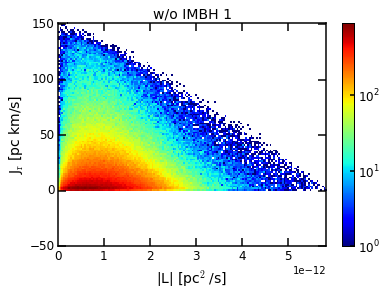

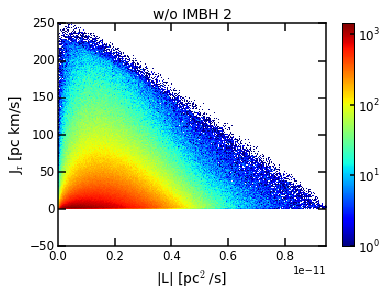

In [22]:
### noIMBH 1 ###

### IMBH 1 ###

# get number of bins from Rice Rule

k_2=int(2.*len(L_wo_2)**(1./3.))

fig=plt.figure()
ax=fig.add_subplot(111)
k_1=int(2.*len(L_wo_1)**(1./3.))
cax=ax.hist2d(L_wo_1,J_r_wo_1,bins=k_1,norm=LogNorm())
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 1',fontsize=14)
ax.set_ylim(-50,)
cbar=fig.colorbar(cax[3],ax=ax)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/L_J_r_hist_noIMBH1.pdf',format='pdf',bbox_inches='tight')
plt.show()


### noIMBH 2 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(L_wo_2,J_r_wo_2,bins=k_2,norm=LogNorm())
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 2',fontsize=14)
ax.set_ylim(-50,)
cbar=fig.colorbar(cax[3],ax=ax)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/L_J_r_hist_noIMBH2.pdf',format='pdf',bbox_inches='tight')
plt.show()


In [50]:
print(np.max(m1_wo_1),np.max(m2_wo_1))

26.784 22.985


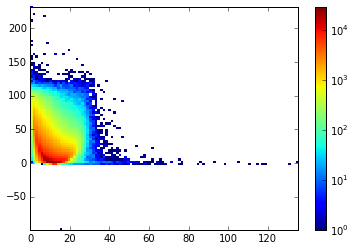

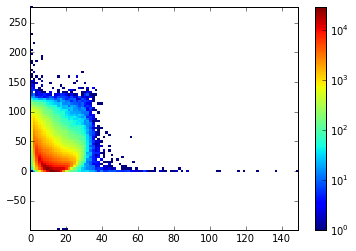

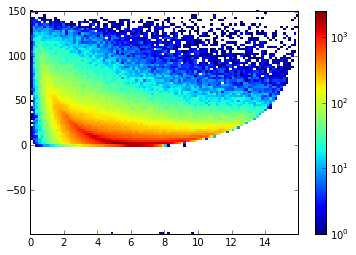

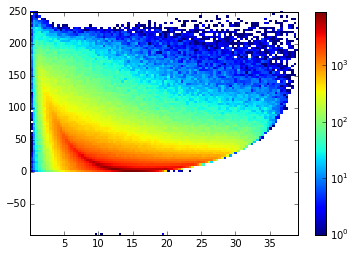

In [30]:
plt.hist2d(np.sqrt(vx_1**2+vy_1**2+vz_1**2)[1:],J_r_1,bins=100,norm=LogNorm())
plt.colorbar()
plt.show()
plt.hist2d(np.sqrt(vx_2**2+vy_2**2+vz_2**2)[1:],J_r_2,bins=100,norm=LogNorm())
plt.colorbar()
plt.show()
plt.hist2d(np.sqrt(vx_wo_1**2+vy_wo_1**2+vz_wo_1**2),J_r_wo_1,bins=100,norm=LogNorm())
plt.colorbar()
plt.show()
plt.hist2d(np.sqrt(vx_wo_2**2+vy_wo_2**2+vz_wo_2**2),J_r_wo_2,bins=100,norm=LogNorm())
plt.colorbar()

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


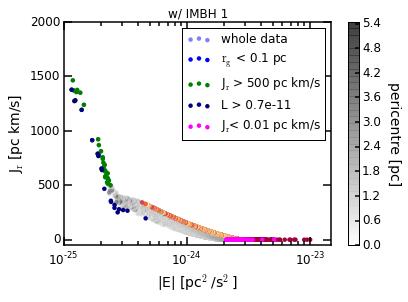

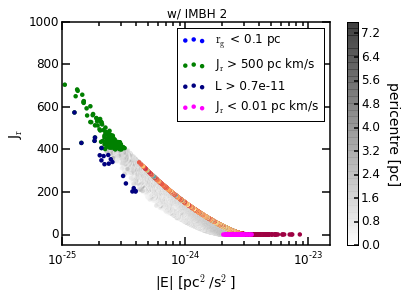

In [25]:
### plot J_r over |E| ###

### IMBH 1 ###

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(np.abs(E_1),J_r_1,c=per_1,cmap='binary',edgecolor="None",alpha=0.5, label='whole data')
ax.scatter(np.abs(E_1[rg_1]),J_r_1[rg_1],c=per_1[rg_1],cmap='Spectral',edgecolor="None", label='$\mathrm{r_g}$ < 0.1 pc')
ax.scatter(np.abs(E_1[l_1_test]),J_r_1[l_1_test],c='green',edgecolor='None',label='J$_\mathrm{r}$ > 500 pc km/s')
ax.scatter(np.abs(E_1[m_1_test]),J_r_1[m_1_test],c='navy',edgecolor='None',label='L > 0.7e-11')
ax.scatter(np.abs(E_1[JR_1]),J_r_1[JR_1],c='magenta',edgecolor='None',label='J$_\mathrm{r}$< 0.01 pc km/s')
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('pericentre [pc]', rotation=270,fontsize=14)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
ax.set_xlim(0.1e-24,0.15e-22)
ax.set_xlabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_ylim(-50,)
ax.set_title('w/ IMBH 1')
ax.set_xscale('log')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
ax.legend(loc=0,numpoints=1)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_parts_IMBH1.png',format='png',dpi=300,bbox_inches='tight')

fig.show()

### IMBH 2 ###

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(np.abs(E_2),J_r_2,c=per_2,cmap='binary',edgecolor="None",alpha=0.5)
ax.scatter(np.abs(E_2[rg_2]),J_r_2[rg_2],c=per_2[rg_2],cmap='Spectral',edgecolor="None", label='$\mathrm{r_g}$ < 0.1 pc')
ax.scatter(np.abs(E_2[l_2_test]),J_r_2[l_2_test],c='green',edgecolor='None',label='J$_\mathrm{r}$ > 500 pc km/s')
ax.scatter(np.abs(E_2[m_2_test]),J_r_2[m_2_test],c='navy',edgecolor='None',label='L > 0.7e-11')
ax.scatter(np.abs(E_2[JR_2]),J_r_2[JR_2],c='magenta',edgecolor='None',label='J$_\mathrm{r}$ < 0.01 pc km/s')

cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('pericentre [pc]', rotation=270,fontsize=14)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
ax.set_xlim(0.1e-24,0.15e-22)
ax.set_ylim(-50,)
ax.set_xlabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.set_title('w/ IMBH 2')
ax.set_xscale('log')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
ax.legend(loc=0,numpoints=1)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_parts_IMBH2.png',format='png',dpi=300,bbox_inches='tight')

fig.show()

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


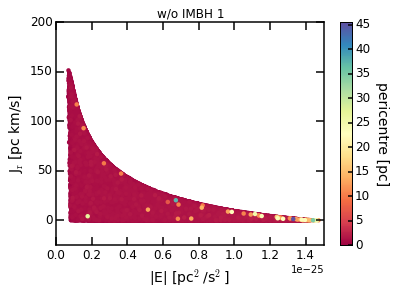

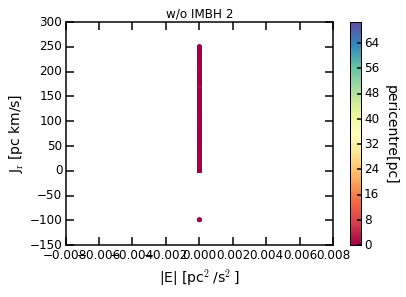

In [55]:
### no IMBH 1 ###
mass_wo_sort1=np.argsort(m1_wo_1+m2_wo_1)
mass_wo_sort2=np.argsort(m1_wo_2+m2_wo_2)
m_wo_sort1=np.sort(m1_wo_1+m2_wo_1)
m_wo_sort2=np.sort(m1_wo_2+m2_wo_2)
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(np.abs(E_wo_1[mass_wo_sort1]),J_r_wo_1[mass_wo_sort1],c=m_wo_sort1,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('pericentre [pc]', rotation=270,fontsize=14)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
ax.set_xlim(0,0.15e-24)
ax.set_ylim(-25,200)
ax.set_xlabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 1')
#ax.set_xscale('log')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_parts_noIMBH1.png',format='png',dpi=300,bbox_inches='tight')

fig.show()


### no IMBH 2 ###
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(np.abs(E_wo_2),J_r_wo_2,c=m1_wo_2+m2_wo_2,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('pericentre[pc]', rotation=270,fontsize=14)
cbar.ax.spines['top'].set_linewidth(1.5)
cbar.ax.spines['right'].set_linewidth(1.5)
cbar.ax.spines['bottom'].set_linewidth(1.5)
cbar.ax.spines['left'].set_linewidth(1.5)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)
#ax.set_xlim(0.1e-24,0.15e-22)
#ax.set_ylim(-50,900)
ax.set_xlabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 2')
#ax.set_xscale('log')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_parts_noIMBH2.png',format='png',dpi=300,bbox_inches='tight')

fig.show()

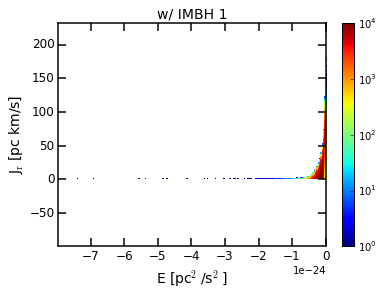

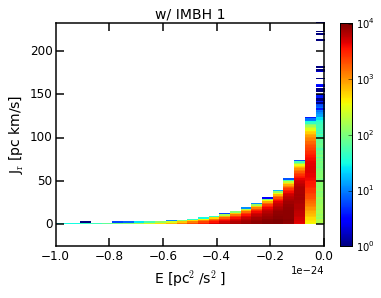

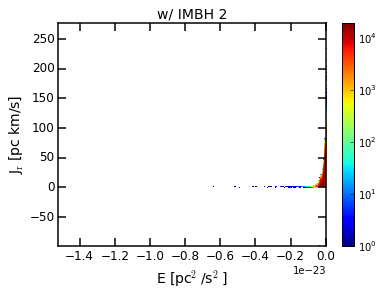

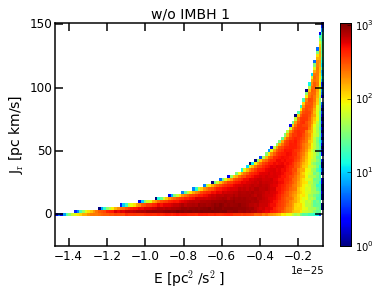

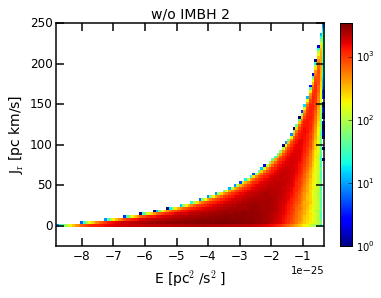

In [39]:
from matplotlib.colors import LogNorm


### IMBH 1 ###
k_1=int(2.*len(E_1)**(1./3.))

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_1,J_r_1,bins=k_1,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 1',fontsize=14)
#ax.set_xlim(right=0.05e-23)
#ax.set_ylim(-50,)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_justIMBH_hist_IMBH1.pdf',format='pdf',bbox_inches='tight')
plt.show()
 
### IMBH 1 ###
k_1=int(2.*len(E_1)**(1./3.))

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_1,J_r_1,bins=k_1,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 1',fontsize=14)
ax.set_xlim(-1e-24,0)
ax.set_ylim(-25,)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_justIMBH_hist_IMBH1.pdf',format='pdf',bbox_inches='tight')
plt.show()

### IMBH 2 ###
k_2=int(2.*len(E_2)**(1./3.))

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_2,J_r_2,bins=k_2,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 2',fontsize=14)


ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_justIMBH_hist_IMBH2.pdf',format='pdf',bbox_inches='tight')
plt.show()

### noIMBH 1 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_wo_1,J_r_wo_1,bins=100,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 1',fontsize=14)
#ax.set_xlim(right=-0.1e-24)
ax.set_ylim(-25,)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_hist_noIMBH1.pdf',format='pdf',bbox_inches='tight')
plt.show()

### noIMBH 2 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_wo_2,J_r_wo_2,bins=100,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 2',fontsize=14)
#ax.set_xlim(right=-0.5e-24)
ax.set_ylim(-25,)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_hist_noIMBH2.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
### J_r over E only for binaries ###



### IMBH 1 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_1[bin_bool_1],J_r_1[bin_bool_1],bins=100,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 1 only binaries',fontsize=14)
ax.set_xlim(right=0.05e-23)
ax.set_ylim(-50,)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_hist_bins_IMBH1.pdf',format='pdf',bbox_inches='tight')
plt.show()
 


### IMBH 2 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_2[bin_bool_2],J_r_2[bin_bool_2],bins=100,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/ IMBH 2 only binaries',fontsize=14)
ax.set_xlim(right=0.05e-23)
ax.set_ylim(-50,)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_hist_bins_IMBH2.pdf',format='pdf',bbox_inches='tight')
plt.show()


### noIMBH 1 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_wo_1[bin_bool_wo_1],J_r_wo_1[bin_bool_wo_1],bins=100,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 1 only binaries',fontsize=14)
ax.set_xlim(right=-0.1e-24)
ax.set_ylim(-50,)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_hist_bins_noIMBH1.pdf',format='pdf',bbox_inches='tight')
plt.show()

### noIMBH 2 ###
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.hist2d(E_wo_2[bin_bool_wo_2],J_r_wo_2[bin_bool_wo_2],bins=100,norm=LogNorm())
ax.set_xlabel('E [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax.set_title('w/o IMBH 2 only binaries',fontsize=14)
ax.set_xlim(right=-0.5e-24)
ax.set_ylim(-50,)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.colorbar(cax[3],ax=ax)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/E_J_r_hist_bins_noIMBH2.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
### plot |E| over |L| ###

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_1,np.abs(E_1),c=r_guide_bh_1,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(0,1e-11)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylim(0.1e-24,0.15e-22)
ax.set_title('w/ IMBH 1')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_2,np.abs(E_2),c=r_guide_bh_2,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(0,1e-11)
ax.set_ylim(0.1e-24,0.15e-22)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_title('w/ IMBH 2')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_wo_1,np.abs(E_wo_1),c=r_guide_wobh_1,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(0,0.6e-11)
ax.set_ylim(0.1e-24,0.15e-22)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_title('w/o IMBH 1')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(L_wo_2,np.abs(E_wo_2),c=r_guide_wobh_2,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(0,1e-11)
ax.set_ylim(0.1e-24,0.15e-22)
ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_title('w/o IMBH 2')
fig.show()
#plt.loglog(L_1,np.abs(E_1),'b.')
#plt.show()
#plt.loglog(L_2,np.abs(E_2),'g.')
#plt.show()
#plt.loglog(L_wo_1,np.abs(E_wo_1),'r.')
#plt.show()
#plt.loglog(L_wo_2,np.abs(E_wo_2),'y.')


In [ ]:
### plot v_circ over r ###

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(r_3d_1[1:],v_circ_1,c=r_guide_bh_1,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(1e-3,1e3)
#ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
#ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylim(1e-13,1e-10)
#ax.set_title('w/ IMBH 1')
ax.set_xscale('log')
ax.set_yscale('log')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(r_3d_2[1:],v_circ_2,c=r_guide_bh_2,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(1e-3,1e3)
ax.set_ylim(1e-13,1e-11)
#ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
#ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
#ax.set_title('w/ IMBH 2')
ax.set_xscale('log')
ax.set_yscale('log')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(r_3d_wo_1,v_circ_wo_1,c=r_guide_wobh_1,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(1e-2,1e2)
ax.set_ylim(1e-14,1e-12)
#ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
#ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
#ax.set_title('w/o IMBH 1')
ax.set_xscale('log')
ax.set_yscale('log')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.scatter(r_3d_wo_2,v_circ_wo_2,c=r_guide_wobh_2,cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('guiding star radius', rotation=270,fontsize=14)
ax.set_xlim(1e-2,1e2)
ax.set_ylim(1e-13,1e-11)
#ax.set_xlabel('|L| [pc$^2$/s]',fontsize=14)
#ax.set_ylabel('|E| [pc$^2$/s$^2$]',fontsize=14)
#ax.set_title('w/o IMBH 2')
ax.set_xscale('log')
ax.set_yscale('log')
#fig.show()

#plt.loglog(r_3d_1[1:],v_circ_1,'b.')
#plt.show()
#plt.loglog(r_3d_2[1:],v_circ_2,'g.')
#plt.show()
#plt.loglog(r_3d_wo_1,v_circ_wo_1,'r.')
#plt.show()
#plt.loglog(r_3d_wo_2,v_circ_wo_2,'y.')


In [ ]:
### plot J_theta over r without guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_mean_1,Jtheta_mean_1,'b.',label='w/ IMHB')
ax.loglog(r_mean_wo_1,Jtheta_mean_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r',fontsize=14)
ax.set_ylabel('J$_\\theta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [ ]:
### plot J_theta over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh_1,Jtheta_mean_1,'b.',label='w/ IMBH')
ax.loglog(r_wo_bh_1,Jtheta_mean_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r$_\mathrm{g}$/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('J$_\\theta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [ ]:
### plot J_phi over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh_1,Jphi_mean_1,'b.',label='w/ IMBH')
ax.loglog(r_wo_bh_1,Jphi_mean_wo_1,'r.',label='w/o IMBH')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r$_\mathrm{g}$/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('J$_\phi$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [ ]:
### plot J_r over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh_1,Jr_mean_1,'b.',label='w/ IMBH 1')
ax.loglog(r_bh_2,Jr_mean_2,'g.', label='w/ IMBH 2')
ax.loglog(r_wo_bh_1,Jr_mean_wo_1,'r.',label='w/o IMBH 1')
ax.loglog(r_wo_bh_2,Jr_mean_wo_2,'y.',label='w/o IMBH 2')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r$_\mathrm{g}$/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [ ]:
### plot beta over r with guiding star radius ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_beta_bh_1,beta_1,'b.',label='w/ IMBH 1')
ax.loglog(r_beta_bh_2,beta_2,'g.',label='w/ IMBH 2')
ax.loglog(r_beta_wo_bh_1,beta_wo_1,'r.',label='w/o IMBH 1')
ax.loglog(r_beta_wo_bh_2,beta_wo_2,'y.',label='w/o IMBH 2')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('anisotropy parameter $\\beta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [ ]:
### plot J_theta over r with guiding star radius ###
#L_bh=np.zeros(len(r_3d))
#L_wobh=np.zeros(len(r_3d_wo))
#for i in range(len(r_3d)):
#    L_bh[i]=bh_orbit.angularmom(x[i],y[i],z[i],vx[i],vy[i],vz[i])[0]
#for i in range(len(r_3d_wo)):
#    L_wobh[i]=wo_bh.angularmom(x_wo[i],y_wo[i],z_wo[i],vx_wo[i],vy_wo[i],vz_wo[i])[0]

In [ ]:
print(np.sum(bin_bool_1), len(x_1),np.sum(bin_bool_1)/len(x_1))
print(np.sum(bin_bool_2),len(x_2),np.sum(bin_bool_2)/len(x_2))
print(np.sum(bin_bool_wo_1),len(x_wo_1),np.sum(bin_bool_wo_1)/len(x_wo_1))
print(np.sum(bin_bool_wo_2),len(x_wo_2),np.sum(bin_bool_wo_2)/len(x_wo_2))

0.35084502809139612

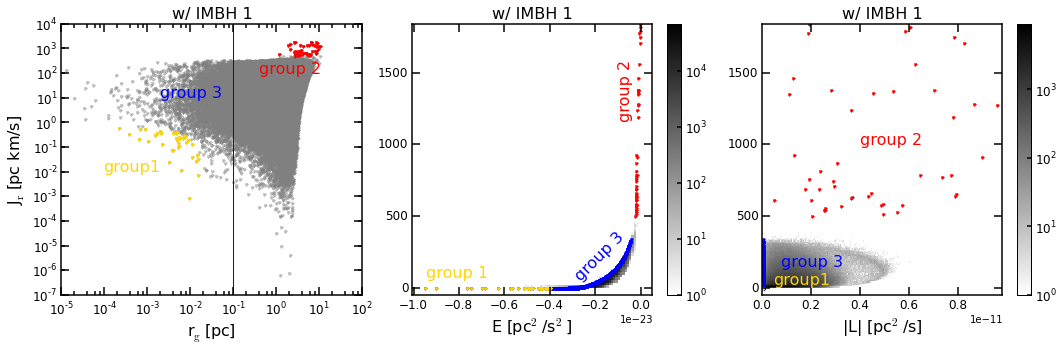

In [18]:
### Plot J_r over E, L and rg with goups of stars ###

fig,axes=plt.subplots(ncols=3,figsize=(15,5))
ax0=axes[0]
ax1=axes[1]
ax2=axes[2]

ax0.loglog(r_guide_bh_sort_1,J_r_bh_sort_1,'.',color='grey',alpha=0.5,label='whole data')
ax0.tick_params(length=8,width=1.5,labelsize=12)
ax0.loglog(r_guide_bh_1[k_1_test],J_r_1[k_1_test],'.',color='gold',label='specific stars group 1')
ax0.loglog(r_guide_bh_1[l_1_test],J_r_1[l_1_test],'.',color='red',label='specific stars group 2')
ax0.axvline(1e-1,color='blue',label='group 3 upper limit')
ax0.set_xlabel('r$_\mathrm{g}$ [pc]',fontsize=16)
ax0.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=16)
ax0.set_title('w/ IMBH 1',fontsize=16)
#ax0.legend(loc=0,numpoints=1)
ax0.text(x=1e-4,y=1e-2,s='group1',color='gold',fontsize=16)
ax0.text(x=4e-1,y=1e2,s='group 2',color='red',fontsize=16)
ax0.text(x=2e-3,y=10,s='group 3',color='blue',fontsize=16)


cax1=ax1.hist2d(E_1,J_r_1,bins=100,norm=LogNorm(),cmap='binary')
ax1.set_xlabel('E [pc$^2$/s$^2$]',fontsize=16)
#ax1.set_ylabel('J$_\mathrm{r}$ [pc km/s]',fontsize=14)
ax1.set_title('w/ IMBH 1',fontsize=16)
ax1.set_xlim(right=0.05e-23)
ax1.set_ylim(-50,)

#bbox_props = dict(boxstyle="round,pad=0.3", fc=None, ec="b", lw=1.5)
#t = ax1.text(0, -1.0, "group1", ha="center", va="center", size=15, bbox=bbox_props)


at = AnchoredText("group 1",
                  prop=dict(size=16,color='gold'), frameon=False,
                  loc=3
                  )
ax1.add_artist(at)

#at2 = AnchoredText('group 2',prop=dict(size=16),frameon=False,loc= (-0.1,1200),rotation=45)
#ax1.add_artist(at2)

ax1.text(x=-0.1e-23,y=1500,s='group 2',rotation=90,fontsize=16,color='red')
ax1.text(x=-0.3e-23,y=320,s='group 3',rotation=45,fontsize=16,color='blue')

ax1.plot(E_1[rg_1],J_r_1[rg_1],'b.') #group 3
ax1.plot(E_1[l_1_test],J_r_1[l_1_test],'.',color='red') #group 2
ax1.plot(E_1[k_1_test],J_r_1[k_1_test],'.',color='gold') #group 1

cbar1=fig.colorbar(cax1[3],ax=ax1)
cbar1.ax.tick_params(length=4,width=1.5,labelsize=12)

k_1=int(2.*len(L_1)**(1./3.))




cax2=ax2.hist2d(L_1,J_r_1,bins=k_1,norm=LogNorm(),cmap='binary')
ax2.set_xlabel('|L| [pc$^2$/s]',fontsize=16)
ax2.set_title('w/ IMBH 1',fontsize=16)
ax2.set_ylim(-50,)

cbar=fig.colorbar(cax2[3],ax=ax2)
cbar.ax.tick_params(length=4,width=1.5,labelsize=12)

ax2.plot(L_1[rg_1],J_r_1[rg_1],'b.') #group 2
ax2.plot(L_1[l_1_test],J_r_1[l_1_test],'r.') #group 2
ax2.plot(L_1[k_1_test],J_r_1[k_1_test],'.',color='gold') #group 1

ax2.text(x=0.05e-11,y=20,s='group1',color='gold',fontsize=16)
ax2.text(x=0.4e-11,y=1000,s='group 2',color='red',fontsize=16)
ax2.text(x=0.08e-11,y=150,s='group 3',color='blue',fontsize=16)

fig.tight_layout()
axes[0].spines['top'].set_linewidth(1.5)
axes[0].spines['right'].set_linewidth(1.5)
axes[0].spines['bottom'].set_linewidth(1.5)
axes[0].spines['left'].set_linewidth(1.5)

axes[0].tick_params(length=8,width=1.5,labelsize=12)
axes[0].tick_params(which='minor',length=4,width=1.5)

axes[1].spines['top'].set_linewidth(1.5)
axes[1].spines['right'].set_linewidth(1.5)
axes[1].spines['bottom'].set_linewidth(1.5)
axes[1].spines['left'].set_linewidth(1.5)

axes[1].tick_params(length=8,width=1.5,labelsize=12)
axes[1].tick_params(which='minor',length=4,width=1.5)

axes[2].spines['top'].set_linewidth(1.5)
axes[2].spines['right'].set_linewidth(1.5)
axes[2].spines['bottom'].set_linewidth(1.5)
axes[2].spines['left'].set_linewidth(1.5)
axes[2].tick_params(length=8,width=1.5,labelsize=12)
axes[2].tick_params(which='minor',length=4,width=1.5)

fig.savefig('../Bachelorarbeit-Entwurf/Plots/J_r_compare_plot.png',format='png',dpi=400,bbox_inches='tight')